# Pymaceuticals Inc.
---



In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_df = pd.merge(mouse_metadata, study_results, how="outer")

# Display the data table for preview
combine_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [40]:
# Checking the number of mice.
combine_df['Mouse ID'].nunique()

249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combine_df[combine_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
duplicate_mouse_ids = combine_df.loc[combine_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combine_df.loc[combine_df['Mouse ID'] == 'g989']
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df.loc[combine_df['Mouse ID'].isin(duplicate_mouse_ids) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [45]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique() # nunique just number

248

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_data = clean_df.groupby("Drug Regimen").mean(numeric_only = True)["Tumor Volume (mm3)"]
median_data = clean_df.groupby("Drug Regimen").median(numeric_only = True)["Tumor Volume (mm3)"]
variance_data = clean_df.groupby("Drug Regimen").var(numeric_only = True)["Tumor Volume (mm3)"]
std_data = clean_df.groupby("Drug Regimen").std(numeric_only = True)["Tumor Volume (mm3)"]
sem_data = clean_df.groupby("Drug Regimen").sem(numeric_only = True)["Tumor Volume (mm3)"]


In [47]:
# Assemble the resulting series into a single summary DataFrame.
new_data_df = pd.DataFrame({"Mean Tumor Volume":mean_data,
                            "Median Tumor Volume":median_data,
                            "Tumor Volume Variance":variance_data,
                            "Tumor Volume Std. Dev":std_data,
                            "Tumor Volume Std. Err":sem_data})

new_data_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
aggregation_results = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(['mean','median','var','std','sem'])
aggregation_results

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

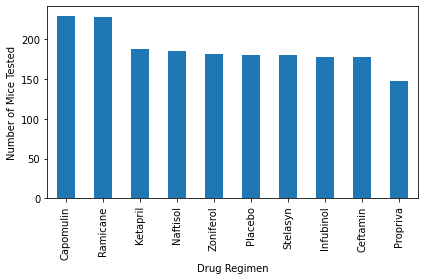

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_mice_df = clean_df["Drug Regimen"].value_counts().plot(kind='bar')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.tight_layout()
plt.show()


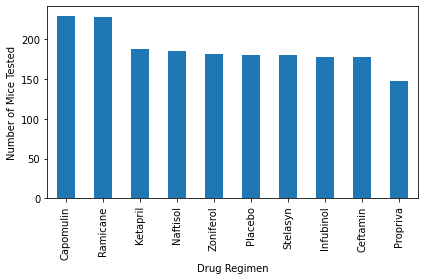

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pyplot
total_mice_df = clean_df["Drug Regimen"].value_counts()
total_mice_df.plot.bar()

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()

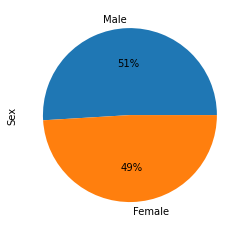

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_df['Sex'].value_counts().plot(kind='pie',autopct='%1.0f%%')

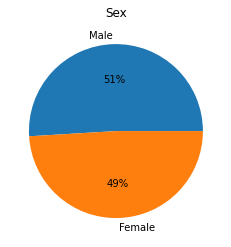

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot
sex_data = clean_df['Sex'].value_counts()
sex_labels = ['Male','Female']

plt.pie(sex_data, labels = sex_labels, autopct='%1.0f%%')
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_tp = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_tp.head()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64

In [54]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = pd.merge(max_tp,clean_df, on=(['Mouse ID','Timepoint']))
tumor_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [55]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    new_regimen = tumor_df.loc[tumor_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_list.append(new_regimen) # adding subset (append)

# Determining outliers using upper and lower bounds
    quartiles = new_regimen.quantile([0.25,0.50,0.75])
    lower_limit = quartiles[.25]
    upper_limit = quartiles[.75]

    IQR = upper_limit - lower_limit

    lower_bounds = lower_limit-(1.5*IQR)
    upper_bounds = upper_limit+(1.5*IQR)
    
    outliers = new_regimen.loc[(new_regimen<lower_bounds)|(new_regimen>upper_bounds)]
    print(treatment)
    print(outliers)

Capomulin
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)


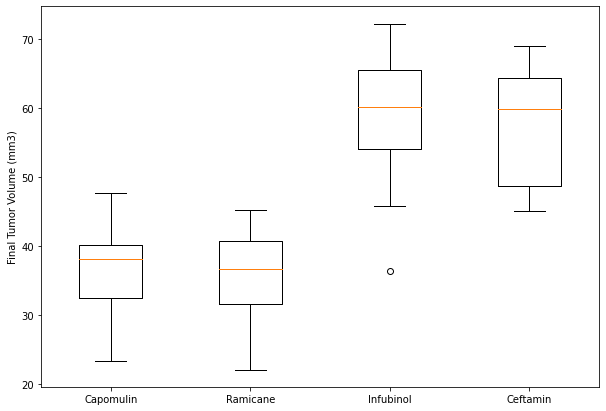

In [56]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig = plt.figure(figsize=(10,7))
plt.boxplot(tumor_vol_list, labels=('Capomulin','Ramicane','Infubinol','Ceftamin'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Finding mice that were treated with Capomulin
capomulin_mice = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_mice.value_counts('Mouse ID').head()

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
dtype: int64

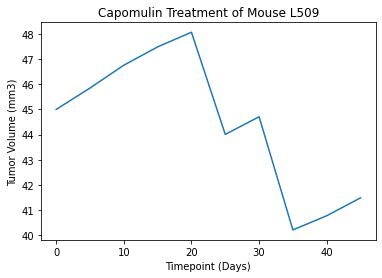

In [58]:
# Creating variable for chosen mouse (L509)
mouse_l509 = clean_df.loc[clean_df['Mouse ID'] == 'l509']

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(mouse_l509['Timepoint'],mouse_l509['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse L509')
plt.show()

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_avg = capomulin_mice.groupby(['Mouse ID']).mean(numeric_only=True)
capomulin_avg.head()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


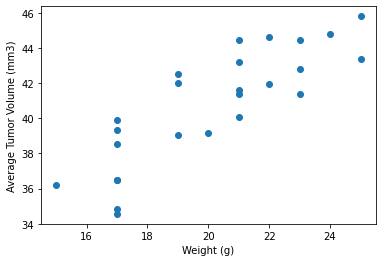

In [60]:
# Plot scatter
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation coefficient between alcohol and color intensity is 0.84


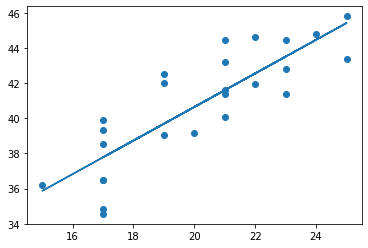

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#capomulin_avg.head()
print(f"The correlation coefficient between alcohol and color intensity is {round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)}")
model = st.linregress((capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)']))
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],capomulin_avg['Weight (g)']*model[0]+model[1]) # y = mx + b 
plt.show()